In [49]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import matplotlib.dates as dates

def open_excel(xl_file, sheetname=None, parse_cols=[1, 2]):
    """
    This function serves as a thin wrapper around pandas.read_excel(). We use it to streamline the importation of 
    several spreadsheets at once.
    :param xl_file: The name of the spreadsheet to be opened.
    :param sheetname: The index-value or name of the sheet to be opened. None by default opens all worksheets.
    :param parse_cols: A list of index-values or names of columns to be read. By default reads the second and third columns.
    """

    # Read the excel spreadsheet and all worksheets within (sheetname=None)
    df_dict = pd.read_excel(xl_file, sheetname=sheetname, parse_cols=parse_cols)

    # Concatenate each of the separate worksheet DataFrames into a single DataFrame
    df = pd.concat([df_dict[k] for k in df_dict.keys()])
    
    # Drop null rows
    df = df.dropna(how='all')
    
    # Rename columns
    df.columns = ['idx', 'state']
    
    # Copy the date/time stamps to a new field
    df['time'] = df['idx']
    
    # Set the index and sort by date
    df = df.set_index('idx')
    df.index.rename(None, inplace=True)
    df = df.sort_index()
    
    # Look for "00" and drop rows
    # df.state.map('{:.0f}'.format)
    # Not implemented yet
               
    return df


# Now we call the function defined above and feed it a list of files we want to read
xl_files = ['Clark 2012.xlsx', 'Clark 2014.xlsx', 'Clark 2015.xlsx']
df_list = []
for xl_file in xl_files:
    df_list.append(open_excel(xl_file))
    
# Compile all of the yearly data together into a single DataFrame and sort by date
df = pd.concat(df_list)
df = df.sort_index()
print df

                     state                 time
2012-08-01 13:35:49      1  2012-08-01 13:35:49
2012-08-01 13:36:22      0  2012-08-01 13:36:22
2012-08-01 14:39:50      1  2012-08-01 14:39:50
2012-08-01 14:40:22      0  2012-08-01 14:40:22
2012-08-01 15:52:53      1  2012-08-01 15:52:53
2012-08-01 15:53:25      0  2012-08-01 15:53:25
2012-08-01 16:13:12      1  2012-08-01 16:13:12
2012-08-01 16:13:45      0  2012-08-01 16:13:45
2012-08-01 16:46:09      1  2012-08-01 16:46:09
2012-08-01 16:46:48      0  2012-08-01 16:46:48
2012-08-01 17:40:19      1  2012-08-01 17:40:19
2012-08-01 17:40:49      0  2012-08-01 17:40:49
2012-08-01 18:32:37      1  2012-08-01 18:32:37
2012-08-01 18:33:08      0  2012-08-01 18:33:08
2012-08-01 19:01:29      1  2012-08-01 19:01:29
2012-08-01 19:02:00      0  2012-08-01 19:02:00
2012-08-01 19:11:13      1  2012-08-01 19:11:13
2012-08-01 19:11:46      0  2012-08-01 19:11:46
2012-08-01 19:39:22      1  2012-08-01 19:39:22
2012-08-01 19:39:53      0  2012-08-01 1

In [50]:
len(df[df['state']==1])

30830

In [51]:
# Compute the time difference between subsequent records
time_diff = df.diff().shift(periods=-1)
print time_diff

                     state     time
2012-08-01 13:35:49     -1  0:00:33
2012-08-01 13:36:22      1  1:03:28
2012-08-01 14:39:50     -1  0:00:32
2012-08-01 14:40:22      1  1:12:31
2012-08-01 15:52:53     -1  0:00:32
2012-08-01 15:53:25      1  0:19:47
2012-08-01 16:13:12     -1  0:00:33
2012-08-01 16:13:45      1  0:32:24
2012-08-01 16:46:09     -1  0:00:39
2012-08-01 16:46:48      1  0:53:31
2012-08-01 17:40:19     -1  0:00:30
2012-08-01 17:40:49      1  0:51:48
2012-08-01 18:32:37     -1  0:00:31
2012-08-01 18:33:08      1  0:28:21
2012-08-01 19:01:29     -1  0:00:31
2012-08-01 19:02:00      1  0:09:13
2012-08-01 19:11:13     -1  0:00:33
2012-08-01 19:11:46      1  0:27:36
2012-08-01 19:39:22     -1  0:00:31
2012-08-01 19:39:53      1  0:18:37
2012-08-01 19:58:30     -1  0:00:35
2012-08-01 19:59:05      1  0:28:02
2012-08-01 20:27:07     -1  0:00:31
2012-08-01 20:27:38      1  0:12:06
2012-08-01 20:39:44     -1  0:00:31
2012-08-01 20:40:15      1  0:16:16
2012-08-01 20:56:31     -1  

In [52]:
# Since the data should be purely sequential (on/off) we can assume that all records with a state value of -1 correspond to 
# times when the pump was on and all records with a state value of 1 correspond to times when the pump was off.
pump_on = time_diff[time_diff['state']==-1]['time']
pump_off = time_diff[time_diff['state']==1]['time']
print pump_on

2012-08-01 13:35:49   00:00:33
2012-08-01 14:39:50   00:00:32
2012-08-01 15:52:53   00:00:32
2012-08-01 16:13:12   00:00:33
2012-08-01 16:46:09   00:00:39
2012-08-01 17:40:19   00:00:30
2012-08-01 18:32:37   00:00:31
2012-08-01 19:01:29   00:00:31
2012-08-01 19:11:13   00:00:33
2012-08-01 19:39:22   00:00:31
2012-08-01 19:58:30   00:00:35
2012-08-01 20:27:07   00:00:31
2012-08-01 20:39:44   00:00:31
2012-08-01 20:56:31   00:00:33
2012-08-01 21:12:30   00:00:32
2012-08-01 22:19:08   00:00:31
2012-08-01 22:57:54   00:00:30
2012-08-01 23:47:40   00:00:40
2012-08-01 23:59:40   00:00:33
2012-08-02 00:33:46   00:00:30
2012-08-02 01:41:46   00:00:30
2012-08-02 02:50:02   00:00:31
2012-08-02 04:00:41   00:00:31
2012-08-02 05:07:03   00:00:38
2012-08-02 05:09:14   00:00:41
2012-08-02 05:11:53   00:00:37
2012-08-02 05:37:14   00:00:31
2012-08-02 05:42:25   00:00:34
2012-08-02 05:46:05   00:00:35
2012-08-02 06:06:31   00:00:32
                        ...   
2015-08-31 22:27:58   00:00:29
2015-08-

In [53]:
# Aggregate the pump-on time by day and export to a .csv file
daily_pump_runtime = pump_on.groupby([pd.TimeGrouper(freq='D')]).aggregate(np.sum).astype('timedelta64[s]') / 60.
# daily_pump_runtime.to_csv('runtime.csv')

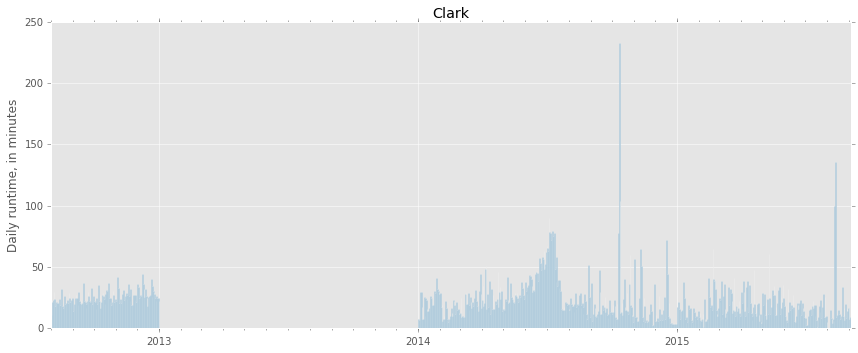

In [54]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(daily_pump_runtime.index, daily_pump_runtime, width=1)
ax.xaxis_date()
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_major_locator(dates.YearLocator())
ax.set_ylabel('Daily runtime, in minutes')
plt.title('Clark')
plt.tight_layout()
plt.savefig('Clark.png')

In [55]:
# Look at min, max, mean and view outliers
print daily_pump_runtime.min(), daily_pump_runtime.max(), daily_pump_runtime.mean(), daily_pump_runtime.std()
print daily_pump_runtime[daily_pump_runtime > (daily_pump_runtime.mean() + daily_pump_runtime.std()*2)]

0.95 233.033333333 21.9006798246 16.4518944225
2014-06-21     57.366667
2014-06-25     58.166667
2014-06-26     56.616667
2014-06-27     62.716667
2014-06-30     61.650000
2014-07-01     66.816667
2014-07-02     65.683333
2014-07-03     62.883333
2014-07-04     89.933333
2014-07-05     78.616667
2014-07-06     77.316667
2014-07-07     71.866667
2014-07-08     72.300000
2014-07-09     78.783333
2014-07-10     74.983333
2014-07-11     76.416667
2014-07-12     77.783333
2014-07-15     57.533333
2014-10-10     77.566667
2014-10-11    233.033333
2014-10-12    103.550000
2014-10-26     59.583333
2014-11-02     56.550000
2014-11-10     64.650000
2014-12-17     71.716667
2015-02-20     64.216667
2015-05-10     60.150000
2015-08-11     99.233333
2015-08-12    135.883333
Name: time, dtype: float64


In [59]:
# Compute water use in gallons per day
low_flow_rate = 15.
med_flow_rate = 17.5 
high_flow_rate = 20.

wu_low = daily_pump_runtime * low_flow_rate
wu_med = daily_pump_runtime * med_flow_rate
wu_high = daily_pump_runtime * high_flow_rate

wu = pd.concat([daily_pump_runtime, wu_low, wu_med, wu_high], axis=1)
wu.columns = ['runtime_minutes', 'wu_low', 'wu_med', 'wu_high']
wu.to_csv('water_use_gpd.csv')

print wu.ix[:-1]

            runtime_minutes   wu_low       wu_med      wu_high
2012-08-01        10.350000   155.25   181.125000   207.000000
2012-08-02        22.816667   342.25   399.291667   456.333333
2012-08-03        21.016667   315.25   367.791667   420.333333
2012-08-04        22.816667   342.25   399.291667   456.333333
2012-08-05        28.933333   434.00   506.333333   578.666667
2012-08-06        23.950000   359.25   419.125000   479.000000
2012-08-07        18.083333   271.25   316.458333   361.666667
2012-08-08        19.650000   294.75   343.875000   393.000000
2012-08-09        20.833333   312.50   364.583333   416.666667
2012-08-10        19.900000   298.50   348.250000   398.000000
2012-08-11        20.633333   309.50   361.083333   412.666667
2012-08-12        23.916667   358.75   418.541667   478.333333
2012-08-13        23.250000   348.75   406.875000   465.000000
2012-08-14        18.783333   281.75   328.708333   375.666667
2012-08-15        25.666667   385.00   449.166667   513

In [58]:
# Compute average water use (gallons per day)
wu_gpd = wu.mean()
print wu_gpd

runtime_minutes     21.900680
low                328.510197
med                383.261897
high               438.013596
dtype: float64
